In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:

#data = pd.read_csv("customer_support_tickets.csv")  
data=pd.read_csv(r"C:\Users\sanga\OneDrive\Desktop\DS ass\customer_support_tickets.csv")
print(data.head())
print(data.info())


   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

In [10]:

data = data.dropna()
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [11]:

X = data.drop(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Satisfaction Rating'], axis=1)
y = data['Customer Satisfaction Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.20818291215403129
Classification Report:
               precision    recall  f1-score   support

         1.0       0.22      0.20      0.21       168
         2.0       0.24      0.21      0.22       174
         3.0       0.23      0.25      0.24       175
         4.0       0.20      0.18      0.19       162
         5.0       0.16      0.19      0.17       152

    accuracy                           0.21       831
   macro avg       0.21      0.21      0.21       831
weighted avg       0.21      0.21      0.21       831

Confusion Matrix:
 [[34 29 35 31 39]
 [40 37 43 25 29]
 [30 30 44 31 40]
 [27 30 33 29 43]
 [25 31 38 29 29]]


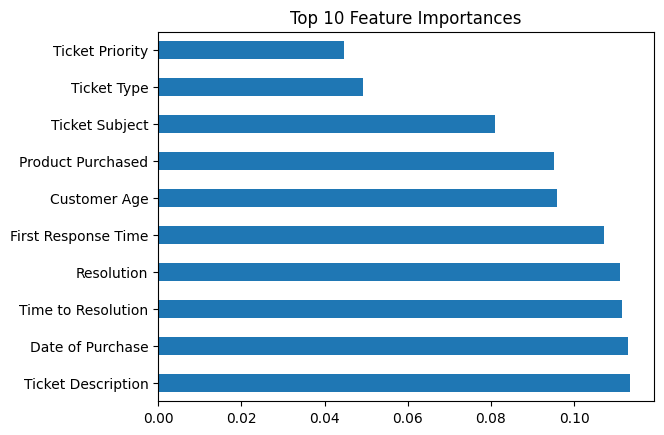

In [15]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()
